In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM

In [2]:
data= pd.read_csv("international-airline-passengers.csv")
data.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [5]:
data[data.iloc[:,1].isnull()]

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
144,International airline passengers: monthly tota...,NaN


In [6]:
data= data.dropna()

In [7]:
data

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [8]:
data= data.iloc[:,1].values
data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [9]:
data_arr = data.reshape(-1,1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_tra = sc.fit_transform(data_arr)
data_tra.shape

(144, 1)

In [11]:
train_size= int(len(data_tra)*0.70)
test_size= len(data_tra)- train_size

In [12]:
train_data= data_tra[:train_size,:]
test_data= data_tra[train_size:,:]
test_data.shape

(44, 1)

In [13]:
def create_data(dataset, lookback=1):
    train, test=[], []
    for i in range(len(dataset)-lookback-1):
        a=dataset[i:(lookback+i),0]
        train.append(a)
        test.append(dataset[lookback+i,0])
    return np.array(train), np.array(test)

In [14]:
train_x, train_y = create_data(train_data,1)
train_x.shape, train_y.shape

((98, 1), (98,))

In [15]:
test_x, test_y= create_data(test_data,1)
test_x.shape, test_y.shape

((42, 1), (42,))

In [16]:
train_x = np.reshape(train_x,(train_x.shape[0],1,train_x.shape[1]))
test_x = np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))
train_x.shape, test_x.shape

((98, 1, 1), (42, 1, 1))

# REG_MODEL

In [17]:
reg_model = Sequential([
    Dense(8, activation="relu", input_dim=(1)),
    Dense(1)
])
reg_model.compile(loss= "mse", optimizer = "adam")
reg_model_history = reg_model.fit(train_x, train_y, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 0s/step - loss: 0.0555
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 0.0517
Epoch 3/100
4/4 [==============================] - 0s 0s/step - loss: 0.0482
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0392
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 13/100
4/4 [==============================] - 0s 0s/step -

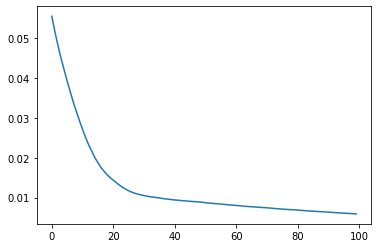

In [18]:
plt.plot(reg_model_history.history["loss"])

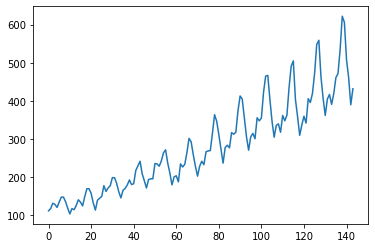

In [19]:
plt.plot(data_arr)

In [20]:
train_pred = reg_model.predict(train_x)
test_pred = reg_model.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [21]:
train_pred= sc.inverse_transform(train_pred)
test_pred= sc.inverse_transform(test_pred)


In [22]:
type(train_pred)

numpy.ndarray

In [23]:
data_final= pd.DataFrame(data_arr)
data_final.head()

,0
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [24]:
data_final.columns=["actual"]

In [25]:
data_final.head()

,actual
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [52]:
data_final.shape

(144, 1)

In [26]:
data_final.tail()

,actual
139,606.0
140,508.0
141,461.0
142,390.0
143,432.0


In [41]:
type(train_pred)

numpy.ndarray

In [42]:
train_pred.shape

(98, 1)

In [46]:
train_list=train_pred.flatten().tolist()
len(train_list)

98

In [49]:
test_list=test_pred.flatten().tolist()
len(test_list)

42

In [51]:
pred= train_list+test_list
len(pred)

140

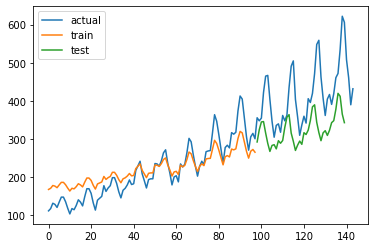

In [65]:
plt.plot(data_arr, label= "actual")
plt.plot(pred[:98], label="train")
plt.plot(np.arange(98,140) ,pred[98:], label='test')
plt.legend()

In [64]:
np.arange(98,140).shape

(42,)